# Pymaceuticals Inc.
---

### Analysis
- firstly, The tumore volume has a positive correlation and idicates the positive relation between Tumore size and weight. The latger the mouse, the bigger the average of the tumor during the treatment period.
- Secondly, the tumor volume differed between the drug regimen groups. Meaning that , some drugs were used for larger mice and some were given to the smaller mice
- Lastly, even in our most promising drug regimens groups, the treatment results (tumor size reduction) was not a straight linar line, meaning in some cases, even with the medicine working, the tumors volume grew even during the treatment. 

In [289]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
combined_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_count = len(combined_data["Mouse ID"].unique())
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_duplicate = combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"])]["Mouse ID"].unique()
mice_duplicate

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
extra_mice = combined_data.loc[combined_data["Mouse ID"] == "g989", :]
extra_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined_data = combined_data.drop(combined_data[combined_data["Mouse ID"] == "g989"].index)

In [6]:
# Checking the number of mice in the clean DataFrame
b = len(combined_data["Mouse ID"].unique())
b

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_volume_mean = clean_combined_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
tumor_volume_median = clean_combined_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tumor_volume_variance = clean_combined_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
tumor_volume_std = clean_combined_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
tumor_volume_sem = clean_combined_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
statistics_df = pd.DataFrame({"Mean Tumor Volume": tumor_volume_mean,
                             "Median Tumor Volume": tumor_volume_median,
                             "Tumor Volume Variance": tumor_volume_variance,
                             "Tumor Volume Std. Dev.": tumor_volume_std,
                             "Tumor Volume Std. Err.": tumor_volume_sem})
statistics_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
statistics_agg =  clean_combined_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
statistics_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

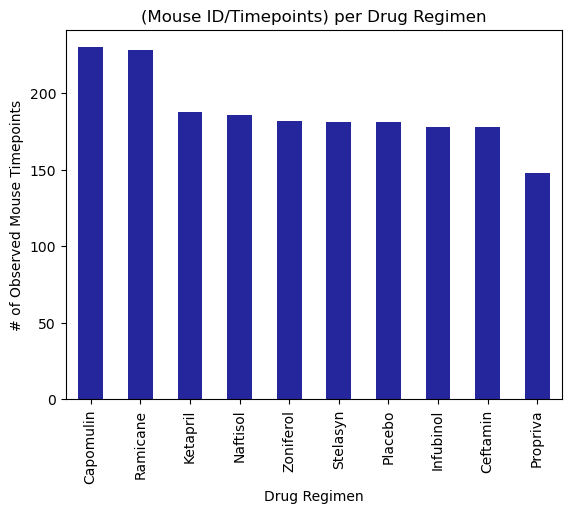

In [9]:
    # Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_use_per_mice = clean_combined_data["Drug Regimen"].value_counts()
pandas_plot = drug_use_per_mice.plot.bar( color='darkblue', alpha=0.85)
plt.title("(Mouse ID/Timepoints) per Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xlabel('Drug Regimen')
plt.show()

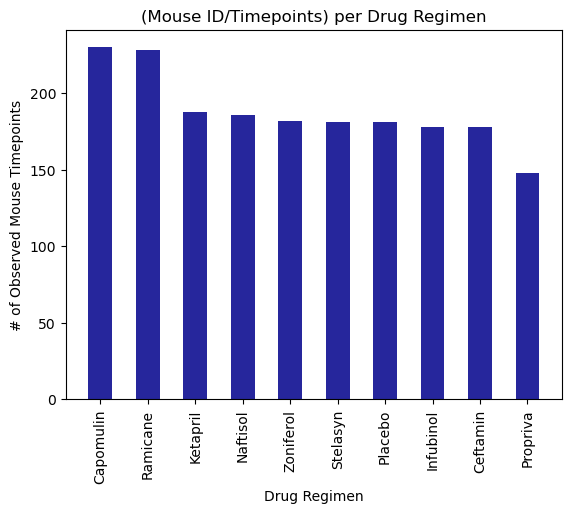

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = drug_use_per_mice.index.values
y_axis = drug_use_per_mice.values

# Giving title and labels
plt.title("(Mouse ID/Timepoints) per Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xlabel('Drug Regimen')

# Creating the plot
plt.bar(x_axis, y_axis, color='darkblue', alpha=0.85, align='center', width=0.5)
plt.xticks(rotation='vertical')

plt.show()

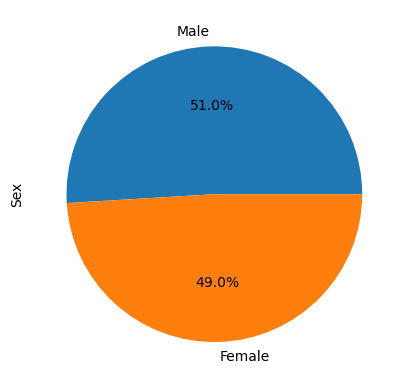

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pandas_pie_df = clean_combined_data["Sex"].value_counts()
panda_pie = pandas_pie_df.plot.pie(autopct="%1.1f%%")

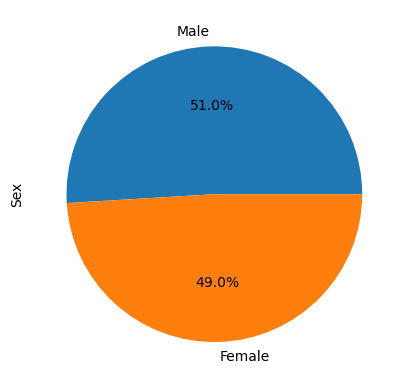

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = clean_combined_data["Sex"].value_counts().index.values
gender_distribution = clean_combined_data["Sex"].value_counts().values
plt.pie(gender_distribution, labels=genders, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [107]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
Capomulin_df = clean_combined_data.loc[clean_combined_data["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_combined_data.loc[clean_combined_data["Drug Regimen"] == "Ramicane",:]
Infubinol_df = clean_combined_data.loc[clean_combined_data["Drug Regimen"] == "Infubinol",:]
Ceftamin_df = clean_combined_data.loc[clean_combined_data["Drug Regimen"] == "Ceftamin",:]
max_tp_Capomulin = Capomulin_df.groupby(["Mouse ID"])["Timepoint"].max()
max_tp_Ramicane = Ramicane_df.groupby(["Mouse ID"])["Timepoint"].max()
max_tp_Infubinol = Infubinol_df.groupby(["Mouse ID"])["Timepoint"].max()
max_tp_Ceftamin = Ceftamin_df.groupby(["Mouse ID"])["Timepoint"].max()
max_tps = pd.concat([max_tp_Capomulin,max_tp_Ramicane,max_tp_Infubinol,max_tp_Ceftamin])

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_tp_df = pd.merge(max_tps, clean_combined_data, on=["Mouse ID", "Timepoint"])
max_tp_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22
...,...,...,...,...,...,...,...,...
95,x226,0,45.000000,0,Ceftamin,Male,23,28
96,x581,45,64.634949,3,Ceftamin,Female,19,28
97,x822,45,61.386660,3,Ceftamin,Male,3,29
98,y769,45,68.594745,4,Ceftamin,Female,6,27


In [122]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatm in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    data = max_tp_df.loc[max_tp_df["Drug Regimen"] == treatm,:]
    
    quartile = data["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartile[0.25]
    upperq = quartile[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)   
    
    tumor_vol_data = data["Tumor Volume (mm3)"].values.tolist()
    tumor_vol_list.append(data["Tumor Volume (mm3)"])

    #     Determine outliers using upper and lower bounds
    outliners =[]
    for x in tumor_vol_data:
        if x < lower_bound or x > upper_bound:
            outliners.append(x)
    print(f'{treatm}\'s potential outliers: {outliners}')

Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: []


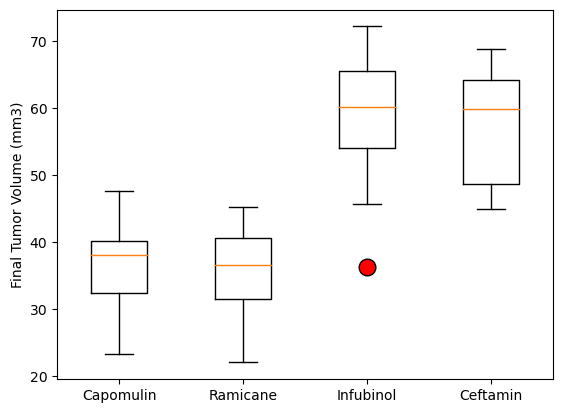

In [154]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
plt.boxplot(tumor_vol_list,labels=treatments, flierprops={'marker': 'o', 'markersize': 12, 'markerfacecolor': 'red'})
plt.show()

## Line and Scatter Plots

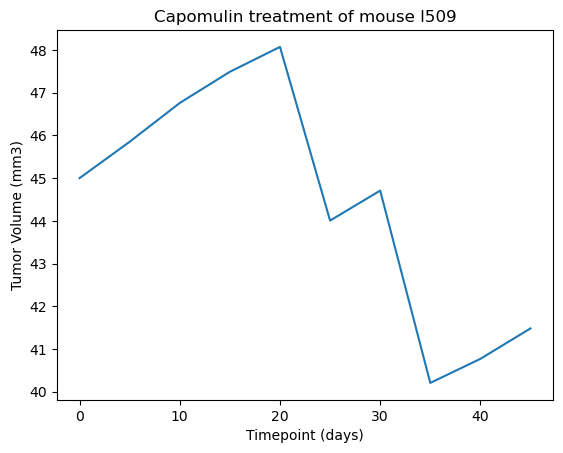

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_mice_tumore_volume = clean_combined_data.loc[clean_combined_data["Mouse ID"] == "s185", :]["Tumor Volume (mm3)"].tolist()
single_mice_Timepoints = clean_combined_data.loc[clean_combined_data["Mouse ID"] == "s185", :]["Timepoint"].tolist()
plt.plot(single_mice_Timepoints, single_mice_tumore_volume)
plt.title("Capomulin treatment of mouse s185")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
plt.show()

In [271]:
Capomulin_df = clean_combined_data.loc[clean_combined_data["Drug Regimen"] == "Capomulin",:]
Capomulin_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


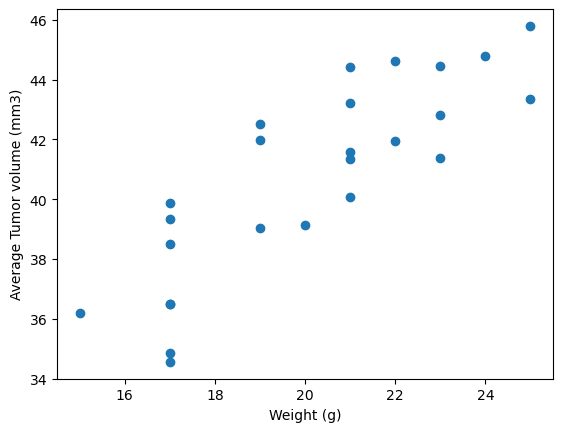

In [314]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_df = clean_combined_data.loc[clean_combined_data["Drug Regimen"] == "Capomulin",:].groupby(["Mouse ID"])
ave_tumor_vol = Capomulin_df["Tumor Volume (mm3)"].mean().tolist()
mice_weights = Capomulin_df["Weight (g)"].first()
plt.scatter(mice_weights, ave_tumor_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor volume (mm3)")
plt.show()

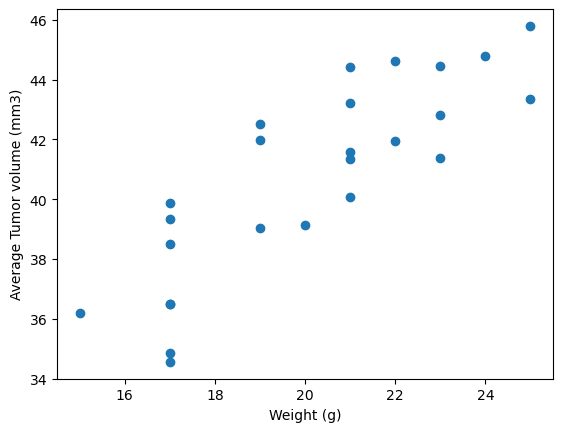

## Correlation and Regression

The correlation betwen mouse weight and the average tumor vokume is 0.84


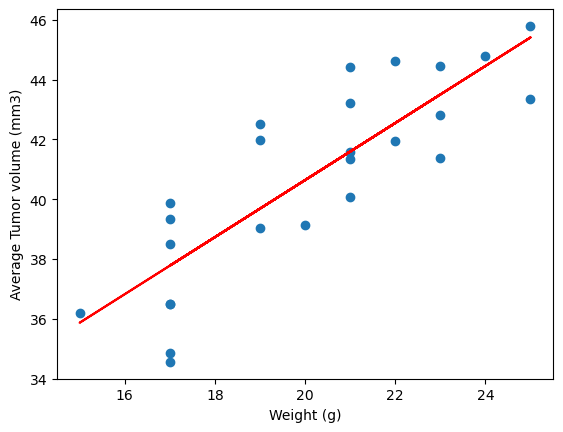

In [329]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_value = mice_weights
y_value = ave_tumor_vol
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
correlation = st.pearsonr(x_value,y_value)
print(f'The correlation betwen mouse weight and the average tumor vokume is {round(correlation[0], 2)}')

regress_value = x_value*slope+intercept
regress_value
plt.scatter(mice_weights, ave_tumor_vol)
plt.plot(x_value,regress_value,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor volume (mm3)")
plt.show()